In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## One-Way ANOVA

In [26]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)
# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups
print(voter_frame.head())
print(groups)
print(groups["asian"])
print(voter_age[groups["asian"]])
# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

       race  age
0     black   51
1     white   49
2  hispanic   51
3     white   48
4     asian   56
{'asian': Int64Index([  4,   7,  14,  21,  49,  53,  59,  78,  95,  98, 135, 136, 162,
            203, 227, 264, 278, 289, 326, 335, 345, 373, 430, 480, 484, 491,
            516, 587, 602, 684, 692, 708, 715, 761, 776, 826, 828, 832, 853,
            897, 942, 951, 986, 996],
           dtype='int64'), 'black': Int64Index([  0,   9,  19,  22,  23,  42,  50,  56,  62,  76,
            ...
            948, 956, 961, 965, 968, 972, 982, 984, 989, 990],
           dtype='int64', length=147), 'hispanic': Int64Index([  2,  10,  24,  28,  31,  32,  38,  40,  44,  45,
            ...
            954, 955, 958, 959, 962, 964, 966, 974, 994, 999],
           dtype='int64', length=244), 'other': Int64Index([ 17,  26,  39,  46,  48,  65,  67,  72, 146, 237, 246, 255, 284,
            302, 317, 322, 358, 370, 386, 413, 425, 446, 530, 542, 569, 571,
            573, 575, 583, 626, 629, 637, 662, 6

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

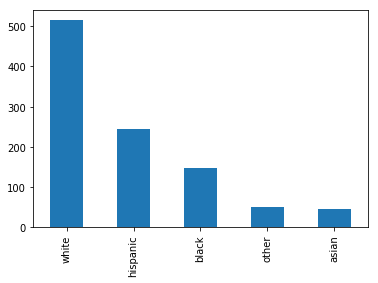

In [27]:
voter_frame.race.value_counts().plot(kind='bar')

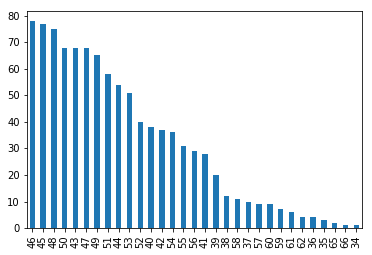

In [28]:
voter_frame.age.value_counts().plot(kind='bar')

In [42]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

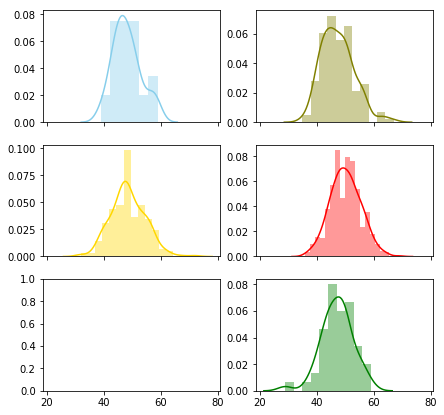

In [39]:
import seaborn as sns
f, axes = plt.subplots(3, 2, figsize=(7, 7), sharex=True)
sns.distplot( asian , color="skyblue", ax=axes[0, 0])
sns.distplot( black , color="olive", ax=axes[0, 1])
sns.distplot( hispanic , color="gold", ax=axes[1, 0])
sns.distplot( white , color="red", ax=axes[1, 1])
sns.distplot( other , color="green", ax=axes[2, 1])

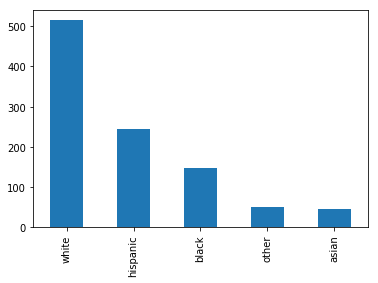

In [30]:
voter_frame.race.value_counts().plot(kind='bar')

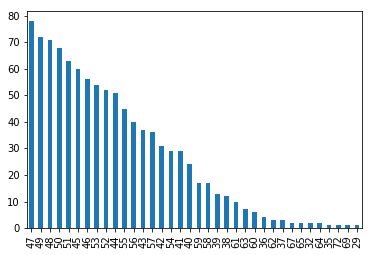

In [31]:
voter_frame.age.value_counts().plot(kind='bar')

In [32]:
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))    

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


group1,group2,meandiff,lower,upper,reject
asian,black,-0.8032,-3.4423,1.836,False
asian,hispanic,0.4143,-2.1011,2.9297,False
asian,other,-1.0645,-4.2391,2.11,False
asian,white,1.9547,-0.4575,4.3668,False
black,hispanic,1.2175,-0.386,2.821,False
black,other,-0.2614,-2.7757,2.253,False
black,white,2.7579,1.3217,4.194,True
hispanic,other,-1.4789,-3.863,0.9053,False
hispanic,white,1.5404,0.3468,2.734,True
other,white,3.0192,0.7443,5.2941,True


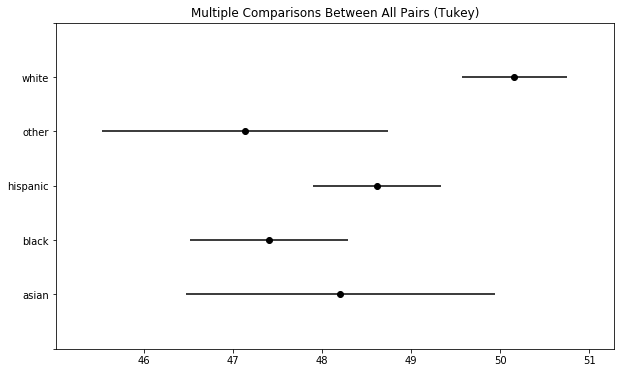

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary